<a href="https://colab.research.google.com/github/SergeyGT/ProbabilityTheory/blob/main/Lab_1_theory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Импорт библиотек для работы с данными и формулами

In [143]:
import numpy as np
import sympy


Загрузка файлов фотографий

In [113]:
from google.colab import files

files.upload()

Saving SochBezPovtor.jpg to SochBezPovtor.jpg
Saving RazmBez.jpg to RazmBez.jpg
Saving Razm_S_Povtor.jpg to Razm_S_Povtor.jpg


{'SochBezPovtor.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00x\x00x\x00\x00\xff\xdb\x00C\x00\x03\x02\x02\x03\x02\x02\x03\x03\x03\x03\x04\x03\x03\x04\x05\x08\x05\x05\x04\x04\x05\n\x07\x07\x06\x08\x0c\n\x0c\x0c\x0b\n\x0b\x0b\r\x0e\x12\x10\r\x0e\x11\x0e\x0b\x0b\x10\x16\x10\x11\x13\x14\x15\x15\x15\x0c\x0f\x17\x18\x16\x14\x18\x12\x14\x15\x14\xff\xdb\x00C\x01\x03\x04\x04\x05\x04\x05\t\x05\x05\t\x14\r\x0b\r\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\xff\xc0\x00\x11\x08\x00\x88\x01\'\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\

# ***Библиотеки для работы с изображениям***

In [101]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import decode_predictions, preprocess_input
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

In [102]:
from IPython.display import Image

***Основной код программы***

Выберите формулу:
    1.Число сочетания без повторений
    2.Число размещения с повторениеми
    3.Число размещения без повторений
    4.Перестановки с повторением

Введите номер формулы: 4


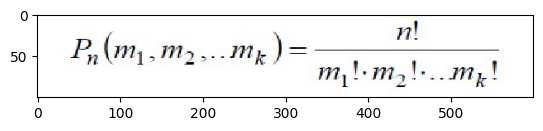

n ≥ 0 (n - целое неотрицательное число)
m ≥ 0 (m - целое неотрицательное число)


Введите n: 3
Введите кол-во параметров m: 3
Введите 3 числа через пробел: 0 -2 3
Границы параметров установлены неверно


In [165]:
# функци решающая формулу
def formula_calculation(n,m,num_action):
  match num_action:
    case 1:
        # библиотечками sympy решаем, он более точнее, чем нумпай и выдает без сокращений результат вычислений, так что всё просто
        result = sympy.factorial(n)/(sympy.factorial(m) * sympy.factorial(n-m))
    case 2:
      result = sympy.Pow(n,m)
    case 3:
      result = sympy.factorial(n)/sympy.factorial(n-m)
    case 4:
      denominator = sympy.prod([sympy.factorial(x) for x in m])
      result = sympy.factorial(n)/denominator

  return result

# функция, выполняющая проверку на правильность установки границ параметров
# n, m - границы
# num_action - номер формулы
# /param[out] - flag - флаг, который делает оценку на удовлетворение границ
def check_correct_entered_n_m(n, m, num_action):
     # тут все ясно, различия есть только в 4-м кейсе)
    flag = false
    match num_action:
      case 1:
        if(n >= 0 and m >= 0 and m <= n):
          flag = true
      case 2:
        if(n >= 0 and m >= 0):
          flag = true
      case 3:
        if(n >= 0 and m >= 0 and m <= n):
          flag = true
      case 4:
        # Второй аргумент означает, что все аргументы массива больше нуля
        if(n >= 0 and np.all(m > 0)):
          flag = true
    return flag


# Функция вывода выбранной формулы на экран
# num_action - номер формулы из списка
def display_formula_on_display(num_action):

 # парни, в комментариях кейса второй вариант вывода формул на экран,
 # подумал, что с фотографиями будет попроще ориентироваться и не приглядываться к буквам маленьким

  match num_action:
         # сочетания без повторений
        case 1:
          # Определение символов
          # C, n, m = symbols('C_n n m')
          # pprint ОБЯЗАТЕЛЬНО, т.к. без него формула не выводится
          # Eq ставит знак между двумя равенствами - запятая разделяет их /// факториалы понятно парни
          # pprint(Eq(Pow(C,m), factorial(n)/(factorial(m)*factorial(n-m))))

          # путь к фото
          img_path = 'SochBezPovtor.jpg'
          # выгружаем фото, устанавливаем разрешение фото
          img = image.load_img(img_path, target_size=(150,500))
          # делаем сетку фото
          plt.imshow(img)
          # выводим на экран
          plt.show()

          print("""n ≥ 0 (n - целое неотрицательное число)
m ≥ 0 (m - целое неотрицательное число)
m ≤ n (m не может превышать n)""")

        # размещения с повторением
        case 2:
          #A, n, m = symbols('A_n n m')
          #A = Symbol('A_ntilde')
          #pprint(Eq(Pow(A,m), Pow(n,m)))

          img_path = 'Razm_S_Povtor.jpg'
          img = image.load_img(img_path, target_size=(100,500))
          plt.imshow(img)
          plt.show()

          print("""n ≥ 0 (n - целое неотрицательное число)
m ≥ 0 (m - целое неотрицательное число)""")
        # размещений без повторения
        case 3:
          #A, n, m = symbols('A_n n m')
          #pprint(Eq(Pow(A,m), factorial(n)/factorial(n-m)))

          img_path = 'RazmBez.jpg'
          img = image.load_img(img_path, target_size=(150,400))
          plt.imshow(img)
          plt.show()

          print("""n ≥ 0 (n - целое неотрицательное число)
m ≥ 0 (m - целое неотрицательное число)
m ≤ n (m не может превышать n)""")

          # Перестановки с повторением
        case 4:
          img_path = 'rearg.jpg'
          img = image.load_img(img_path, target_size=(100,600))
          plt.imshow(img)
          plt.show()

          print("""n ≥ 0 (n - целое неотрицательное число)
m ≥ 0 (m - целое неотрицательное число)""")


# main функция
if __name__ == '__main__':
    # Выбор действия пользователя
    print("""Выберите формулу:
    1.Число сочетания без повторений
    2.Число размещения с повторениеми
    3.Число размещения без повторений
    4.Перестановки с повторением\n""")

    # Хранит номер операции
    numOfAction = int(input("Введите номер формулы: "))
    # Вызывем функцию вывода формулы выбранной на экран
    display_formula_on_display(numOfAction)

    print("\n")

    n = int(input("Введите n: "))
    if(numOfAction != 4):
      m = int(input("Введите m: "))
    else:
      count_param_m = int(input(("Введите кол-во параметров m: ")))
      input_str_params = input("Введите {} числа через пробел: ".format(count_param_m))
      # разделяем строчку на отдельные цифры и числа
      nums = input_str_params.split()
      # Преобразование строковых значений в числа
      numbers = [int(num) for num in nums]

      # Создание массива NumPy из списка чисел
      arr = np.array(numbers)

    # Здесь нахуярил всего, потому что заебался
    if(check_correct_entered_n_m(n, m, numOfAction)):
      print("OK")
      if(numOfAction != 4):
        print("Result is {}".format(formula_calculation(n,m,numOfAction)))
      else:
        print("Result is {}".format(formula_calculation(n,arr,numOfAction)))
    else:
      print("Границы параметров установлены неверно")